<a href="https://colab.research.google.com/github/bushht/Assignments/blob/main/Lesson_7_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bushra Hoteit**

Github link:

**1. Imports**

In [1]:
# TODO: Import all the necessary libraries for data handling, visualization, and model building.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**2. Data Collection and Loading**

In [2]:
# TODO: Load the 'Boston Housing' dataset from sklearn and convert it into a pandas DataFrame.
# Hint: Use `load_boston()` from `sklearn.datasets`

data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

values_w_nulls = raw_df.values.flatten()    #Since not all the columns are on the same row
all_values = values_w_nulls[~np.isnan(values_w_nulls)]   # rmeove NaNs
df = pd.DataFrame(all_values.reshape(-1, len(columns)), columns=columns)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**3. Quick Check of Data**

In [3]:
# TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

df.info()

# All data types are numerical so its not categorical, its continuous

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**4. EDA and Data Preprocessing**

In [6]:
# TODO: Check for missing/null values.
# Hint: Use `.isnull().sum()` to check for null values.

df.isnull().sum()

# No missing values in the data

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


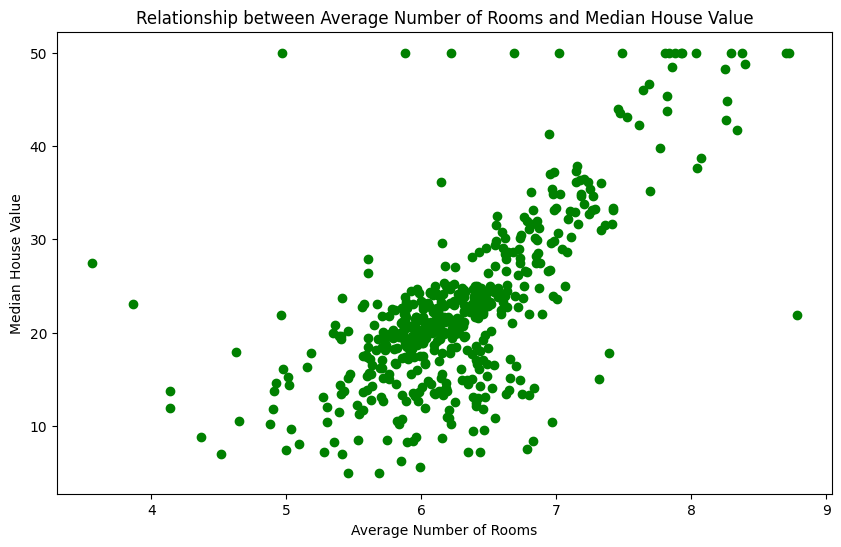

In [7]:
# TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable.
# Example: Use `plt.scatter()` to visualize the relationship between features like 'RM' (average number of rooms) and the target ('MEDV').

plt.figure(figsize=(10, 6))
plt.scatter(df['RM'], df['MEDV'], color= 'green')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value')
plt.title('Relationship between Average Number of Rooms and Median House Value')
plt.show()

# Positive relationship between average number of rooms & the house value.
# As number of rooms increases so does the value of the house

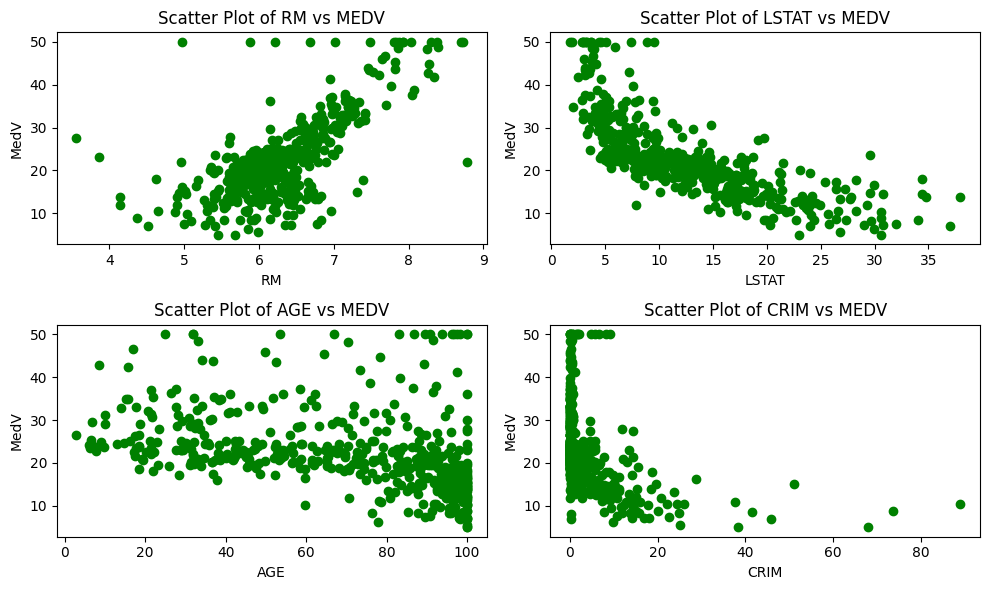

In [8]:
# TODO: Create a function to automate scatter plots for all features vs the target variable.
# Hint: The function should loop over a list of features and plot scatter plots for each.
# TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Example: ['RM', 'LSTAT', 'AGE', 'CRIM']
# Target: 'MEDV'

def scatter_vs_target (features, target):
    plt.figure(figsize=(10, 6))

    for i, feature in enumerate(features):
        plt.subplot(2, 2, i +1)
        plt.scatter(df[feature], df[target], color= 'green')
        plt.title(f'Scatter Plot of {feature} vs MEDV')
        plt.xlabel(feature)
        plt.ylabel('MedV')
    plt.tight_layout()
    plt.show()

features= ['RM', 'LSTAT', 'AGE', 'CRIM']
target= 'MEDV'

scatter_vs_target(features, target)

**5. ML Model Training**

In [9]:
# TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.
# Define X (features) and y (target) and perform the train-test split:

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [10]:
# TODO: Choose an appropriate regression model: Decision Tree or Random Forest.
# Hint: Use either `DecisionTreeRegressor` or `RandomForestRegressor` from `sklearn.tree` or `sklearn.ensemble`.

# Trying both models
from sklearn.ensemble import RandomForestRegressor
model_1 = RandomForestRegressor(random_state=42)

from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor(random_state=42)

In [11]:
# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

**6. Model Evaluation**

In [17]:
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.

# Perform parameter tuning on the model if needed to improve the performance of your model.

# Predict on the test set and calculate the evaluation metrics:


y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

mse_1 = mean_squared_error(y_test, y_pred_1)
mse_2 = mean_squared_error(y_test, y_pred_2)

rmse_1 = np.sqrt(mse_1)
rmse_2 = np.sqrt(mse_2)

r2_1 = r2_score(y_test, y_pred_1)
r2_2 = r2_score(y_test, y_pred_2)

print("Evaluation metrics using Random Forest Model:")
print(f"Mean Squared Error (MSE): {mse_1:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1:.2f}")
print(f"R-squared (R²): {r2_1:.2f}")

print("\nEvaluation metrics using Decision Tree Model:")
print(f"Mean Squared Error (MSE): {mse_2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_2:.2f}")
print(f"R-squared (R²): {r2_2:.2f}")

Evaluation metrics using Random Forest Model:
Mean Squared Error (MSE): 7.90
Root Mean Squared Error (RMSE): 2.81
R-squared (R²): 0.89

Evaluation metrics using Decision Tree Model:
Mean Squared Error (MSE): 10.42
Root Mean Squared Error (RMSE): 3.23
R-squared (R²): 0.86


Random Forest model is performing better across all metrics:

Lower MSE & RMSE compared to Decision Tree --> lower prediciton errors.

Higher R2 compared to Decision Tree --> better at explaining the variance in the target variable.

The Random Forest model explains 89% of the variance in the housing prices, so it is considered a reliable model for prediciting housing prices in this dataset.

**7. Model Prediction**

In [18]:
# TODO: Predict house prices from a new set of feature inputs.
# Example new data: Use hypothetical or randomly generated values for the features.
# Example new data: CRIM = 0.2, ZN = 12.5, INDUS = 7.07, CHAS = 0, NOX = 0.5, RM = 6.5, AGE = 68, DIS = 4.0, RAD = 2, TAX = 250, PTRATIO = 17, B = 400, LSTAT = 12

# Using Random Forest

new_data = np.array([[0.2, 12.5, 7.07, 0, 0.5, 6.5,68, 4.0, 2, 250, 17,400, 12]])

predicted_price = model_1.predict(new_data)
print(f"Predicted house price: ${predicted_price[0]:.2f}")

Predicted house price: $22.19


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
